## Sentiment Analysis using Text Classification

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Import train_test_split
from sklearn.model_selection import train_test_split
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [41]:
# Import RegexTokenizer
from nltk.tokenize import RegexpTokenizer

In [42]:
# Input text
paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Converting paragraph in lowercase 
print(paragraph.lower())

taj mahal is one of the beautiful monuments. it is one of the wonders of the world. it was built by shah jahan in 1631 in memory of his third beloved wife mumtaj mahal.


### Classification using Bag of Words

#### Load the Dataset

In [43]:
# read the dataset
df = pd.read_csv('../data/amazon_alexa.tsv', sep='\t')
    
# Show top 5-records
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


#### Explore the dataset

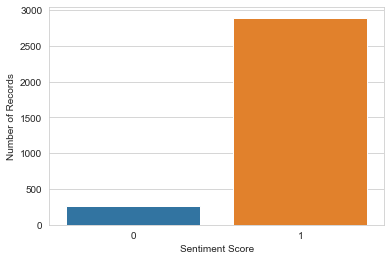

In [44]:
# Count plot
sns.countplot(x='feedback', data=df)
 
# Set X-axis and Y-axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')
 
# Show the plot using show() function
plt.show()


#### Feature Generation using CountVectorizer 

In [45]:
# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
 
# Initialize CountVectorizer object
count_vectorizer = CountVectorizer(
                    lowercase=True,
                    stop_words='english',
                    ngram_range = (1,1),
                    tokenizer = regex_tokenizer.tokenize)
 
# Fit and transform the dataset
count_vectors = count_vectorizer.fit_transform(df['verified_reviews'])

In [46]:
# Printing the identified Unique words along with their indices
print("Vocabulary: ", count_vectorizer.vocabulary_)

Vocabulary:  {'love': 1962, 'echo': 1026, 'loved': 1963, 'playing': 2408, 'game': 1345, 'answer': 162, 'question': 2562, 'correctly': 723, 'alexa': 116, 'says': 2827, 'got': 1405, 'wrong': 3703, 'answers': 165, 'like': 1888, 'able': 5, 'turn': 3446, 'lights': 1887, 'away': 263, 'home': 1547, 'lot': 1956, 'fun': 1327, 'thing': 3333, 'yr': 3729, 'old': 2226, 'learns': 1860, 'dinosaurs': 910, 'control': 697, 'play': 2405, 'games': 1346, 'categories': 491, 'nice': 2165, 'sound': 3059, 'music': 2118, 'received': 2622, 'gift': 1376, 'needed': 2145, 'bluetooth': 362, 'easily': 1022, 'accessible': 15, 'smart': 3004, 'speaker': 3080, 't': 3259, 'wait': 3594, 'having': 1490, 'cellphone': 502, 'use': 3525, 'features': 1232, 'ipad': 1735, 'great': 1427, 'alarm': 109, 'u': 3464, 'r': 2575, 'deaf': 811, 'hear': 1502, 'bedroom': 311, 'living': 1916, 'room': 2783, 'reason': 2611, 'ask': 214, 'random': 2582, 'questions': 2564, 'response': 2748, 'does': 967, 'smartbon': 3005, 'politics': 2430, 'think': 

In [47]:
# Get output feature names for transformation
print(" Feature Names: ", count_vectorizer.get_feature_names_out())

 Feature Names:  ['abay' 'abc' 'abd' ... 'zonked' 'zzzz' 'zzzzzzz']


In [48]:
# Fetch the effective stop words list.
print("Stop Words: ", count_vectorizer.get_stop_words())

Stop Words:  frozenset({'always', 'however', 'your', 'seemed', 'other', 'side', 'serious', 'even', 'hence', 'not', 'during', 'often', 'although', 'too', 'towards', 'etc', 'whither', 'whose', 'she', 'is', 'for', 'due', 'every', 'ourselves', 'up', 'rather', 'top', 'their', 'being', 'amongst', 'about', 'a', 'somehow', 'while', 'only', 'anything', 'at', 'whereupon', 'get', 'though', 'around', 'found', 'show', 'throughout', 'together', 'bottom', 'whatever', 'cant', 'further', 'anyhow', 'against', 'hereupon', 'herein', 'off', 'thereby', 'beside', 'yourselves', 'itself', 'also', 'herself', 'becoming', 'across', 'fire', 'empty', 'few', 'therefore', 'down', 'one', 'ever', 'part', 'thence', 'behind', 'back', 'any', 'hasnt', 'put', 'will', 'the', 'several', 'forty', 'others', 'on', 'con', 'until', 'under', 'into', 'through', 'both', 'his', 'all', 'by', 'myself', 'amount', 'if', 'call', 'beyond', 'might', 'could', 'mine', 'where', 'made', 'fill', 'neither', 'either', 'last', 'whenever', 'them', 't

In [49]:
# Summarizing the Encoded Texts
print("Encoded Document: ", count_vectors.toarray())

Encoded Document:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### Split train and test set

In [50]:
# Partition data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(count_vectors, df['feedback'], test_size=0.3, random_state=1)

#### Classification Model Building using Logistic Regression

In [51]:
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(X_train,y_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(X_test)

#### Evaluate the Classification Model

In [52]:
# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(y_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision:",precision_score(y_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall:",recall_score(y_test, predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score:",f1_score(y_test, predictions))

Logistic Regression Model Accuracy: 0.9428571428571428
Logistic Regression Model Precision: 0.952433628318584
Logistic Regression Model Recall: 0.9873853211009175
Logistic Regression Model F1-Score: 0.9695945945945945


### Classification using TF-IDF

In [53]:
# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
 
# Initialize TfidfVectorizer object
tfidf = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = regex_tokenizer.tokenize)
 
# Fit and transform the dataset
text_tfidf= tfidf.fit_transform(df['verified_reviews'])

In [54]:
# Printing the identified Unique words along with their indices
print("Vocabulary: ", tfidf.vocabulary_)

Vocabulary:  {'love': 1962, 'echo': 1026, 'loved': 1963, 'playing': 2408, 'game': 1345, 'answer': 162, 'question': 2562, 'correctly': 723, 'alexa': 116, 'says': 2827, 'got': 1405, 'wrong': 3703, 'answers': 165, 'like': 1888, 'able': 5, 'turn': 3446, 'lights': 1887, 'away': 263, 'home': 1547, 'lot': 1956, 'fun': 1327, 'thing': 3333, 'yr': 3729, 'old': 2226, 'learns': 1860, 'dinosaurs': 910, 'control': 697, 'play': 2405, 'games': 1346, 'categories': 491, 'nice': 2165, 'sound': 3059, 'music': 2118, 'received': 2622, 'gift': 1376, 'needed': 2145, 'bluetooth': 362, 'easily': 1022, 'accessible': 15, 'smart': 3004, 'speaker': 3080, 't': 3259, 'wait': 3594, 'having': 1490, 'cellphone': 502, 'use': 3525, 'features': 1232, 'ipad': 1735, 'great': 1427, 'alarm': 109, 'u': 3464, 'r': 2575, 'deaf': 811, 'hear': 1502, 'bedroom': 311, 'living': 1916, 'room': 2783, 'reason': 2611, 'ask': 214, 'random': 2582, 'questions': 2564, 'response': 2748, 'does': 967, 'smartbon': 3005, 'politics': 2430, 'think': 

In [55]:
# Get output feature names for transformation
print(" Feature Names: ", tfidf.get_feature_names_out())

 Feature Names:  ['abay' 'abc' 'abd' ... 'zonked' 'zzzz' 'zzzzzzz']


In [56]:
# Fetch the effective stop words list.
print("Stop Words: ", tfidf.get_stop_words())

Stop Words:  frozenset({'always', 'however', 'your', 'seemed', 'other', 'side', 'serious', 'even', 'hence', 'not', 'during', 'often', 'although', 'too', 'towards', 'etc', 'whither', 'whose', 'she', 'is', 'for', 'due', 'every', 'ourselves', 'up', 'rather', 'top', 'their', 'being', 'amongst', 'about', 'a', 'somehow', 'while', 'only', 'anything', 'at', 'whereupon', 'get', 'though', 'around', 'found', 'show', 'throughout', 'together', 'bottom', 'whatever', 'cant', 'further', 'anyhow', 'against', 'hereupon', 'herein', 'off', 'thereby', 'beside', 'yourselves', 'itself', 'also', 'herself', 'becoming', 'across', 'fire', 'empty', 'few', 'therefore', 'down', 'one', 'ever', 'part', 'thence', 'behind', 'back', 'any', 'hasnt', 'put', 'will', 'the', 'several', 'forty', 'others', 'on', 'con', 'until', 'under', 'into', 'through', 'both', 'his', 'all', 'by', 'myself', 'amount', 'if', 'call', 'beyond', 'might', 'could', 'mine', 'where', 'made', 'fill', 'neither', 'either', 'last', 'whenever', 'them', 't

In [57]:
# Summarizing the Encoded Texts
print("Encoded Document: ", text_tfidf.toarray())

Encoded Document:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
feature_train, feature_test, target_train, target_test = train_test_split(text_tfidf, df['feedback'], test_size=0.3, random_state=1)

In [59]:
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

In [60]:
# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score:",f1_score(target_test, predictions))

Logistic Regression Model Accuracy: 0.9238095238095239
Logistic Regression Model Precision: 0.923728813559322
Logistic Regression Model Recall: 1.0
Logistic Regression Model F1-Score: 0.960352422907489
